<a href="https://colab.research.google.com/github/claireweng801006/data-analysis/blob/main/EDA_Superstore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Analysis އ

> Context: With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

**背景：**

隨著市場需求的增長和激烈的競爭，一家超市巨頭正在尋求專業知識，來幫助他們了解對他們而言最有效的策略。他們希望了解應該針對或避免哪些產品、區域、類別和客戶群體。

**在這個情境下，目標是幫助超市巨頭深入分析其銷售數據，並根據分析結果制定更精確的市場策略。以下是一些分析方向：**

**產品分析：**

了解哪些產品的銷售最為強勁，哪些則表現較差。這可以幫助確定應該加強推廣或減少庫存的產品。

**區域分析：**
分析各個區域的銷售情況，找出哪些地理區域的需求較大，哪些則可能有潛力，但目前表現較弱。

**類別分析：**
確定哪個產品類別最受歡迎，哪些類別的銷售需要提高。這有助於調整庫存和定價策略。

**客戶群體分析：**
根據不同的市場細分（例如年齡、收入、購買行為等）來了解哪些客戶群體貢獻了最多的銷售，哪些群體則有成長空間。

**透過這些分析，超市巨頭能夠做出更加明智的決策，從而提升銷售和客戶滿意度。**

我們將分析一個超市資料集，該資料集包含了許多資訊，如客戶 ID、客戶名稱、客戶所在城市等。

此筆記本將按照以下結構進行：


**1.**使用的庫（Used Library）：載入所需的 Python 庫。

**2.**數據初步檢視（First Look to the Data）：檢視資料集的結構和一些基本內容。

**3.**數據清理（Data Cleaning）：處理缺失值、異常數據等。

**4.**數據視覺化（Data Visualization）：利用視覺化工具分析資料。

**5.**按類別分析利潤（Profit Per Category）：查看不同類別的利潤情況。

**6.**各區域最常訂購的類別（Most Ordered Category Per Region）：分析每個區域最常訂購的產品類別。

**7.**查看日期數據（Look into the Date）：分析日期數據的相關信息。

**8.**城市與利潤（City & Profit）：分析不同城市的利潤情況。

**9.**客戶分析（Customers）：根據客戶資訊進行分析。

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 In this notebook we are going to analyse the superstore dataset that's contains lot's of informations such as the customer ID his name the city of the custome and so on. The notebook will be organized as above: <br>
    <b> Used Library -- First Look to the Data -- Data Cleaning -- Data Visualization -- Profit Per Category --  Most Ordered Category Per Region -- Look into the Date --  City & Profit -- Customers -- Machine Learning   </b>
    
</div>


![image](https://media-exp1.licdn.com/dms/image/C4E12AQHG1RNjrpiZ-w/article-inline_image-shrink_1500_2232/0/1561471706289?e=2147483647&v=beta&t=w0yQRQSY-ZmSI7KS3vR_nmUQaSbPcXJxWNMvUMHDFcg)

<font size=4> Metadata </font>
* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

# Used Library 📖 <br>
We'll use basic python library well known for data analysis and observation
*  Numpy link: https://numpy.org
*  Pandas link: https://pandas.pydata.org
*  Matplotlib link: https://matplotlib.org
*  Plotly link: https://plotly.com
<hr>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U ydata-profiling
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
import math
import seaborn as sns
#Instead of using pandas-profiling, use ydata-profiling since it has been renamed.
from ydata_profiling import ProfileReport
%matplotlib inline

# First Look to the Data 👀


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 As I did in my others notebooks where i try to analyse the dataset,i like to create a function to get the data it can be useful when you got a bug to get the original dataset. In this first step we'll see the columns names,check if there are any missing value, the description and make a profile report, the profile report is very important to have a good understanding of the data it make statistics for you and show the partitions...
</div>

In [20]:
sns.set_style('whitegrid')
data = pd.read_csv("/content/drive/MyDrive/data/Sample - Superstore.csv", encoding='cp1252') # Added encoding='cp1252'
data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

#### Note If you do not precise the encoding you'll get an error like this: <br>
<code>'utf-8' codec can't decode byte 0xa0 in position 2944: invalid start byte </code>

在讀取 CSV 文件時，應該指定適當的編碼，例如 utf-8 或 latin-1，以避免錯誤。

In [14]:
df = getData()
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 We have the row id as colum we can see for the country only United States probably we'll need to make a little bit of data cleaning
</div>

In [22]:
# 查看資料筆數跟欄位數目
data.shape

(9994, 21)

In [23]:
# 檢查資料欄位的型態，以及缺失狀況
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [24]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [41]:
# 查看一下資料的基本統計值

data.describe(include='all')

Order Date   Ship Date       Ship Mode Customer ID  Customer Name  \
count        9994        9994            9994        9994           9994   
unique       1237        1334               4         793            793   
top      9/5/2016  12/16/2015  Standard Class    WB-21850  William Brown   
freq           38          35            5968          37             37   
mean          NaN         NaN             NaN         NaN            NaN   
std           NaN         NaN             NaN         NaN            NaN   
min           NaN         NaN             NaN         NaN            NaN   
25%           NaN         NaN             NaN         NaN            NaN   
50%           NaN         NaN             NaN         NaN            NaN   
75%           NaN         NaN             NaN         NaN            NaN   
max           NaN         NaN             NaN         NaN            NaN   

         Segment           City       State   Postal Code Region  \
count       9994           9994        9994   9994.000000   9994   
unique         3            531          49           NaN      4   
top     Consumer  New York City  California           NaN   West   
freq        5191            915        2001           NaN   3203   
mean         NaN            NaN         NaN  55190.379428    NaN   
std          NaN            NaN         NaN  32063.693350    NaN   
min          NaN            NaN         NaN   1040.000000    NaN   
25%          NaN            NaN         NaN  23223.000000    NaN   
50%          NaN            NaN         NaN  56430.500000    NaN   
75%          NaN            NaN         NaN  90008.000000    NaN   
max          NaN            NaN         NaN  99301.000000    NaN   

             Product ID         Category Sub-Category     Product Name  \
count              9994             9994         9994             9994   
unique             1862                3           17             1850   
top     OFF-PA-10001970  Office Supplies      Binders  Staple envelope   
freq                 19             6026         1523               48   
mean                NaN              NaN          NaN              NaN   
std                 NaN              NaN          NaN              NaN   
min                 NaN              NaN          NaN              NaN   
25%                 NaN              NaN          NaN              NaN   
50%                 NaN              NaN          NaN              NaN   
75%                 NaN              NaN          NaN              NaN   
max                 NaN              NaN          NaN              NaN   

               Sales     Quantity     Discount       Profit  
count    9994.000000  9994.000000  9994.000000  9994.000000  
unique           NaN          NaN          NaN          NaN  
top              NaN          NaN          NaN          NaN  
freq             NaN          NaN          NaN          NaN  
mean      229.858001     3.789574     0.156203    28.656896  
std       623.245101     2.225110     0.206452   234.260108  
min         0.444000     1.000000     0.000000 -6599.978000  
25%        17.280000     2.000000     0.000000     1.728750  
50%        54.490000     3.000000     0.200000     8.666500  
75%       209.940000     5.000000     0.200000    29.364000  
max     22638.480000    14.000000     0.800000  8399.976000

In [26]:
# 使用pandas-profiling來進行自動化數據分析（EDA, Exploratory Data Analysis），並輸出一份HTML格式的報告。
profiling = ProfileReport(df)
profiling.to_file("profiling.html")
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 Some information that we got from the profile report <br>
    Country has constant value "United States"	Constant <br>
    Order ID has a high cardinality: 5009 distinct values	 <b> High cardinality </b><br>
Order Date has a high cardinality: 1237 distinct values	 <b>High cardinality </b><br>
Ship Date has a high cardinality: 1334 distinct values	<b>High cardinality</b><br>
Customer Name has a high cardinality: 793 distinct values	<b>High cardinality</b><br>
City has a high cardinality: 531 distinct values	<b>High cardinality</b><br>
Product Name has a high cardinality: 1850 distinct values	<b>High cardinality</b><br>
Discount is highly correlated with Profit	<b>High correlation</b><br>
Profit is highly correlated with Sales and 1 other fields	<b>High correlation</b><br>
</div>



# Data Cleaning ⏳
*Data Cleaning represent 90% of data processing*

In [39]:
# 列出DataFrame中的所有欄位名稱
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [ ]:
# 刪除DataFrame中不必要的欄位, 並且直接修改DataFrame

# 已經確定某些欄位是無用的（例如 ID 或常數值）
data.drop(columns=['Row ID', 'Order ID', 'Country'], inplace=True)
# 查看剩餘欄位
print(data.columns)
# 顯示前幾筆資料
data.head()

# Data Visualization 🔮

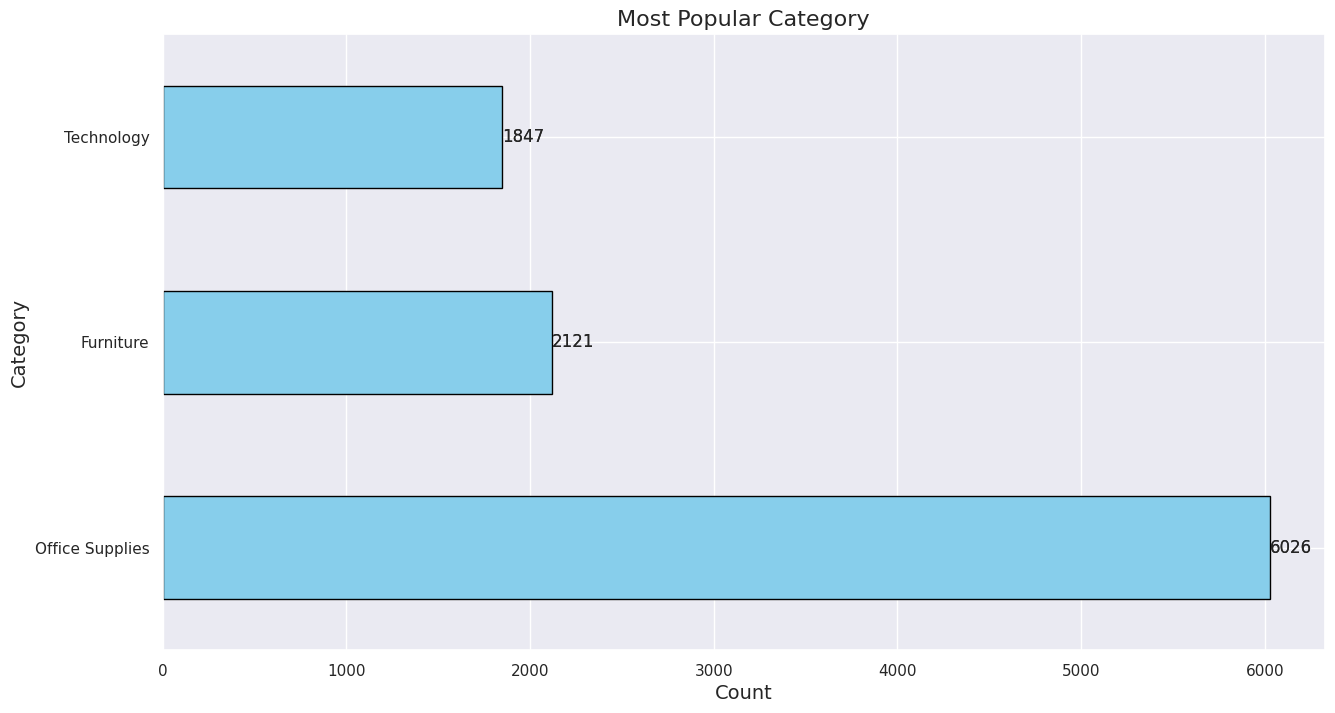

In [47]:
# 使用seaborn和pandas來視覺化產品類別（Category）的熱門程度，並繪製水平長條圖（barh）。

# 初階設定
# 圖表大小（15 寬 x 8 高）
sns.set(rc={'figure.figsize': (15, 8)})
# 繪製 "Category" 欄位的數量分布（水平長條圖）
data['Category'].value_counts().plot(kind='barh', title='Most Popular Category')

# 進階優化
sns.set(rc={'figure.figsize': (15, 8)})
ax = data['Category'].value_counts().plot(kind='barh', color='skyblue', edgecolor='black')
# 設定標題 & 標籤
plt.title('Most Popular Category', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
# 顯示數值標籤
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12)

plt.show()

圖表說明

df['Category'].value_counts()：統計不同產品類別出現的次數（熱門程度）。

.plot(kind='barh')：使用水平長條圖來視覺化數據。

title='Most Popular Category'：為圖表加上標題。

<ipython-input-51-89b5449bca2f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-51-89b5449bca2f>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




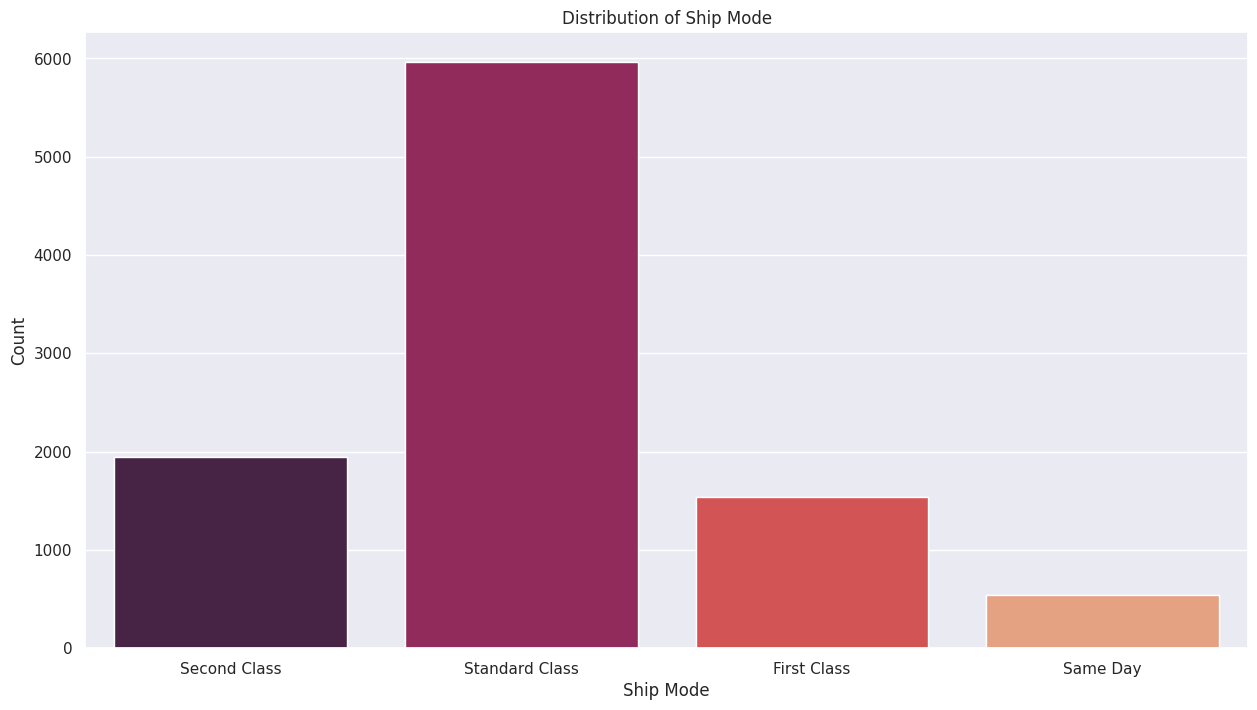

<ipython-input-51-89b5449bca2f>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




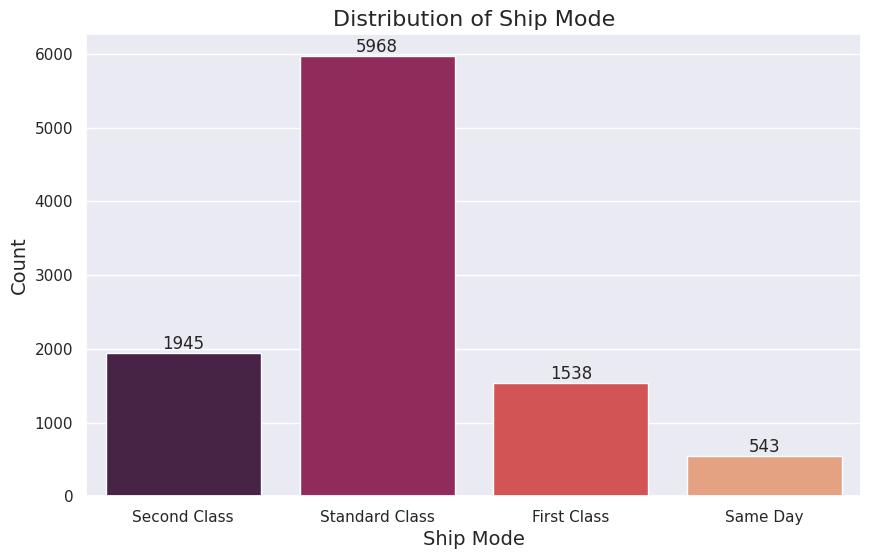

In [51]:
# 使用seaborn來繪製Ship Mode（運輸方式）的數量分布圖。

# 方法一
sns.countplot(x=data['Ship Mode'],palette='rocket')

# 方法二
sns.countplot(x=data['Ship Mode'], palette='rocket')
plt.title('Distribution of Ship Mode')  # 設定標題
plt.xlabel('Ship Mode')  # 設定 X 軸標籤
plt.ylabel('Count')  # 設定 Y 軸標籤
plt.show()

# 方法三
plt.figure(figsize=(10, 6))  # 設定圖表大小
ax = sns.countplot(x=data['Ship Mode'], palette='rocket')

# 加入數值標籤
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12)

plt.title('Distribution of Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

圖表說明

sns.countplot() → 用於計算 每種 Ship Mode 出現的次數，並繪製長條圖。

x=df['Ship Mode'] → 指定 X 軸為 Ship Mode 欄位（運輸方式）。

palette='rocket' → 設定 rocket 色系，使圖表更美觀。

plt.title() → 加入圖表標題。

plt.xlabel() & plt.ylabel() → 設定 X 軸與 Y 軸標籤。

## Profit Per Category


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌Category<br>
Furniture           18451.2728 <br>
Office Supplies    122490.8008<br>
Technology         145454.9481<br>
<b> Technology Category is the first one however is also the category that have the less order </b><br>
</div>

**這段數據顯示了不同產品類別（Category）的利潤，並且提供了一些有趣的見解：**

📊 利潤數據
Furniture：18451.2728

Office Supplies：122490.8008

Technology：145454.9481

Technology類別的利潤最高，但它的訂單數量卻是最少的，

這可能表明單價較高的產品，即使訂單較少，卻仍能夠帶來較高的利潤。

📌 **利潤與訂單數量的關係**

如果想了解利潤與訂單數量之間的關係，你可以用**groupby**來計算

每個類別的平均利潤和訂單數量，並畫出比較圖表。

📈 進一步分析：利潤與訂單數量關係

<Axes: title={'center': 'Category Profit'}, ylabel='Category'>

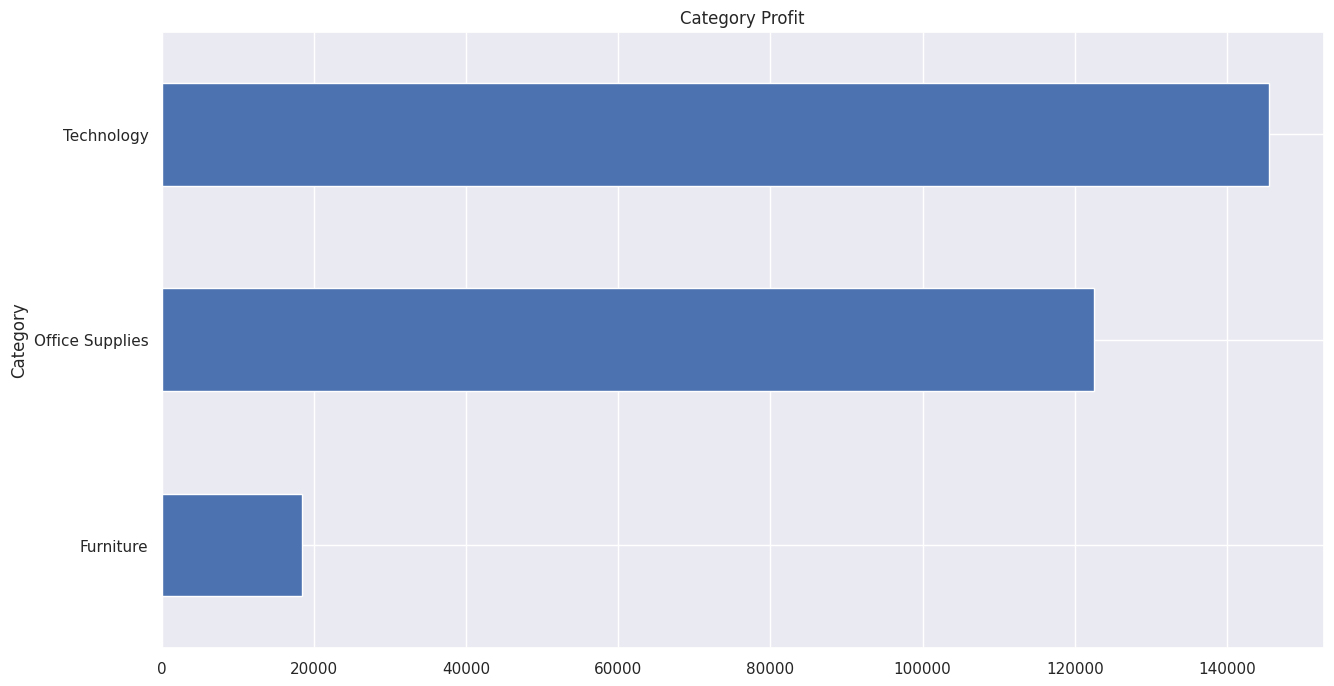

In [57]:
# 使用pandas和matplotlib來按產品類別（Category）計算總利潤，並以水平長條圖（barh）顯示出來。
data.groupby('Category')['Profit'].sum().plot(kind='barh',title='Category Profit')

📊 **圖表說明**

這會顯示各個產品類別的**總利潤**，並按利潤的大小進行排序。

這有助於快速查看哪些類別的產品貢獻了最多的利潤。

<Axes: title={'center': 'Category Sales'}, ylabel='Category'>

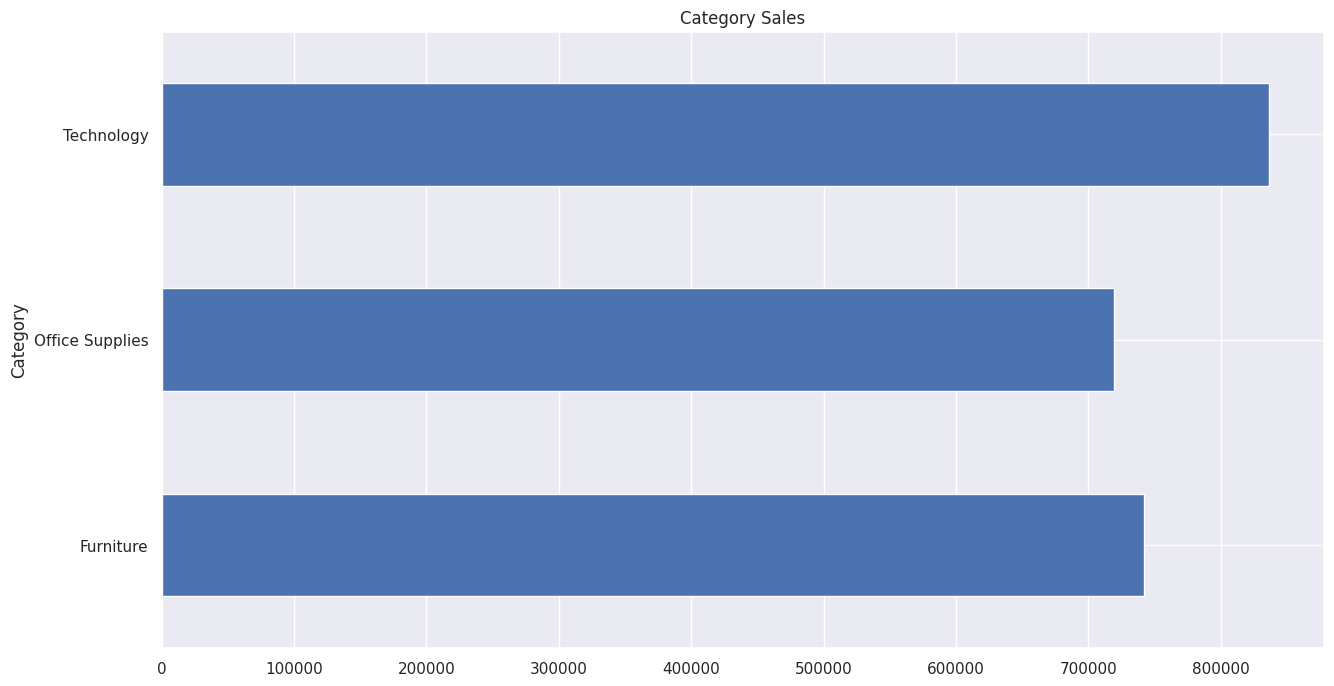

In [58]:
# 計算各產品類別（Category）的總銷售額（Sales），並以水平長條圖（barh）來顯示結果。
data.groupby('Category')['Sales'].sum().plot(kind='barh',title='Category Sales')

📊 **圖表說明**

這會顯示每個產品類別的**總銷售額**，並按銷售額的大小進行排序，

幫助你了解哪些類別的產品銷售最多。

In [59]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

<Axes: title={'center': 'Quantity that has been sold'}, ylabel='Category'>

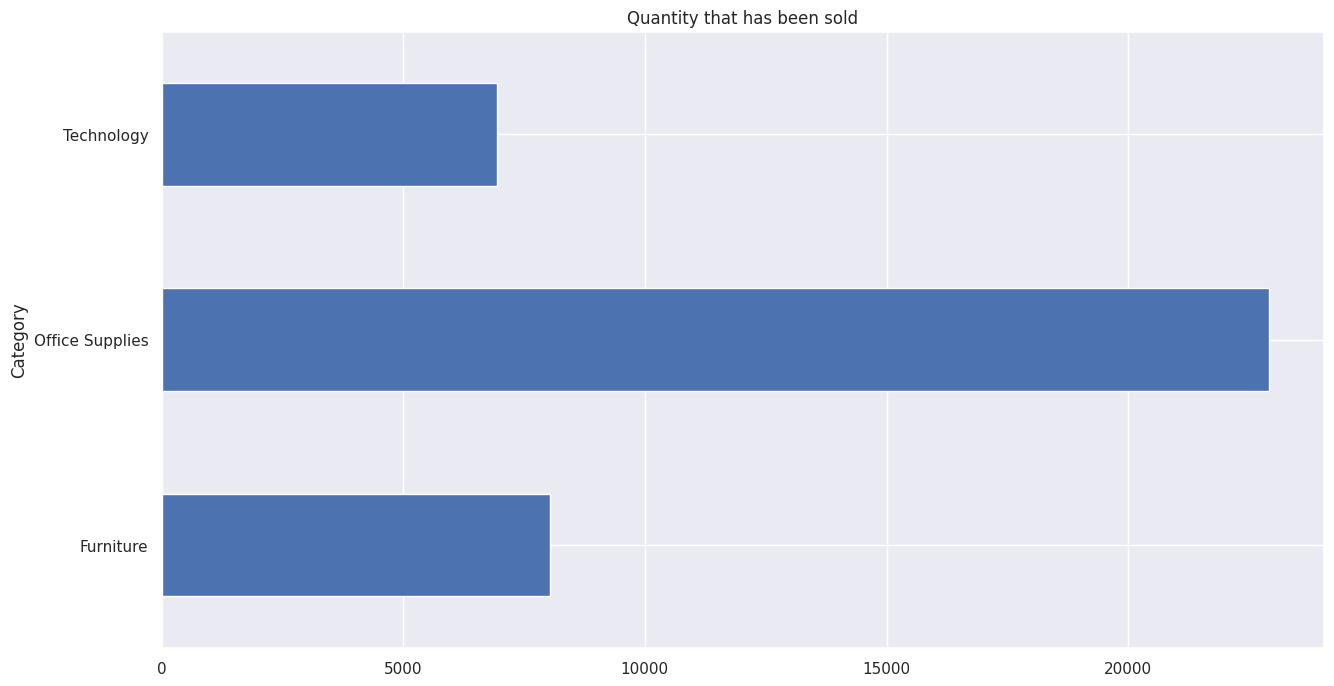

In [60]:
# 計算各產品類別（Category）的總銷售量（Quantity），並以水平長條圖（barh）顯示結果。
data.groupby('Category')['Quantity'].sum().plot(kind='barh',title='Quantity that has been sold')

📊 **圖表說明**

這會顯示每個產品類別的**總銷售量**，並按銷售量的大小進行排序，

讓你快速了解哪些類別的產品賣得最多。

<ipython-input-62-bb956a139e0b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




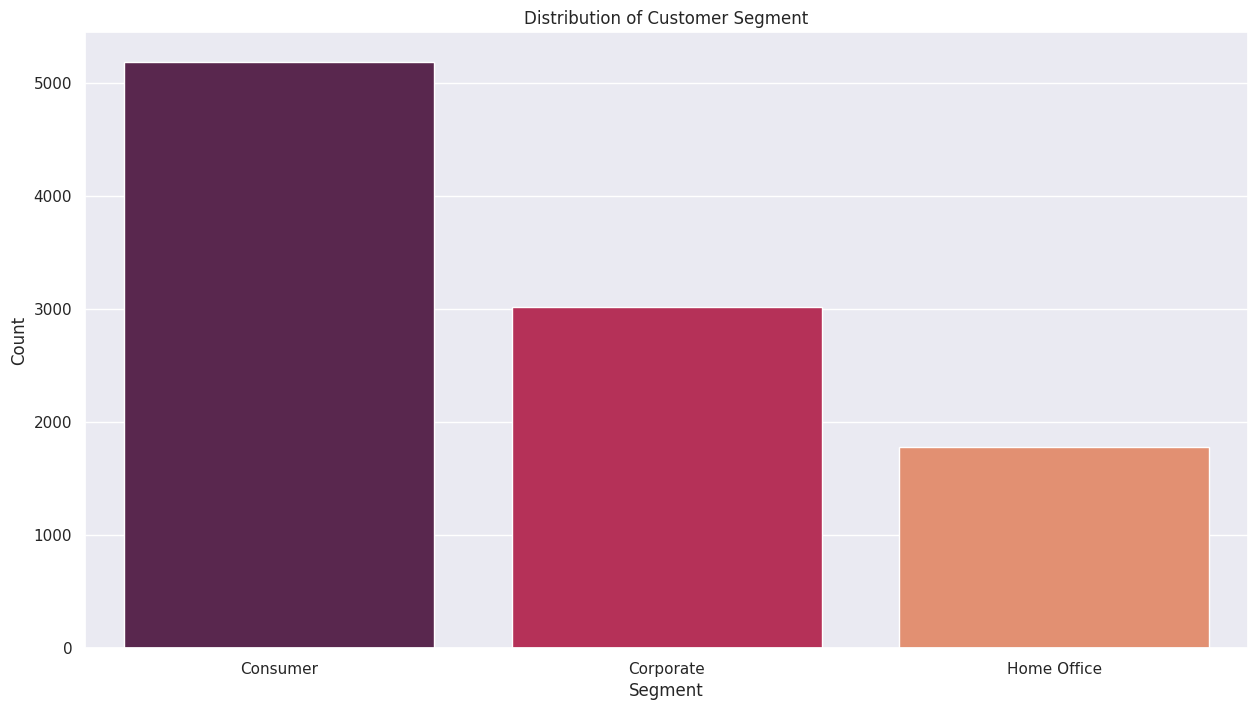

In [62]:
# 使用seaborn來繪製Segment（顧客類別）的數量分布圖。countplot是用來計算每個類別的出現次數，並繪製長條圖。
sns.countplot(x=data['Segment'],palette='rocket') #計算 Segment 欄位每個顧客類別的出現次數，並用長條圖來顯示。
plt.title('Distribution of Customer Segment') # 設定標題
plt.xlabel('Segment')  # 設定 X 軸標籤
plt.ylabel('Count')  # 設定 Y 軸標籤
plt.show()

📊 **圖表說明**

這張圖表顯示不同顧客類別（例如：Consumer, Corporate, Home Office）

的出現頻率，幫助你了解不同顧客類別的分布情況。

### Most Ordered Category Per Region 🗺
<b> Global Plot </b>

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 We can see that in each category the West is number one
</div>

**各地區訂購量最多的類別**

**West（西區）在每個產品類別中，都名列第一。**

這提供了有價值的見解，顯示在西區的銷售活動最為活躍，

可能是因為這裡的市場需求、客戶基礎、或促銷策略等因素。

📌 **進一步分析的方向**

你可以根據不同的地區（Region）和產品類別（Category）進行視覺化，
例如：

比較每個地區的銷售分布

了解哪個地區在每個類別上表現最好

📊 **視覺化：最受訂購類別 per Region**

使用groupby計算每個地區的每個類別的銷售額，並繪製柱狀圖來展示。

<Axes: title={'center': 'Quantity that has been sold'}, ylabel='Region,Category'>

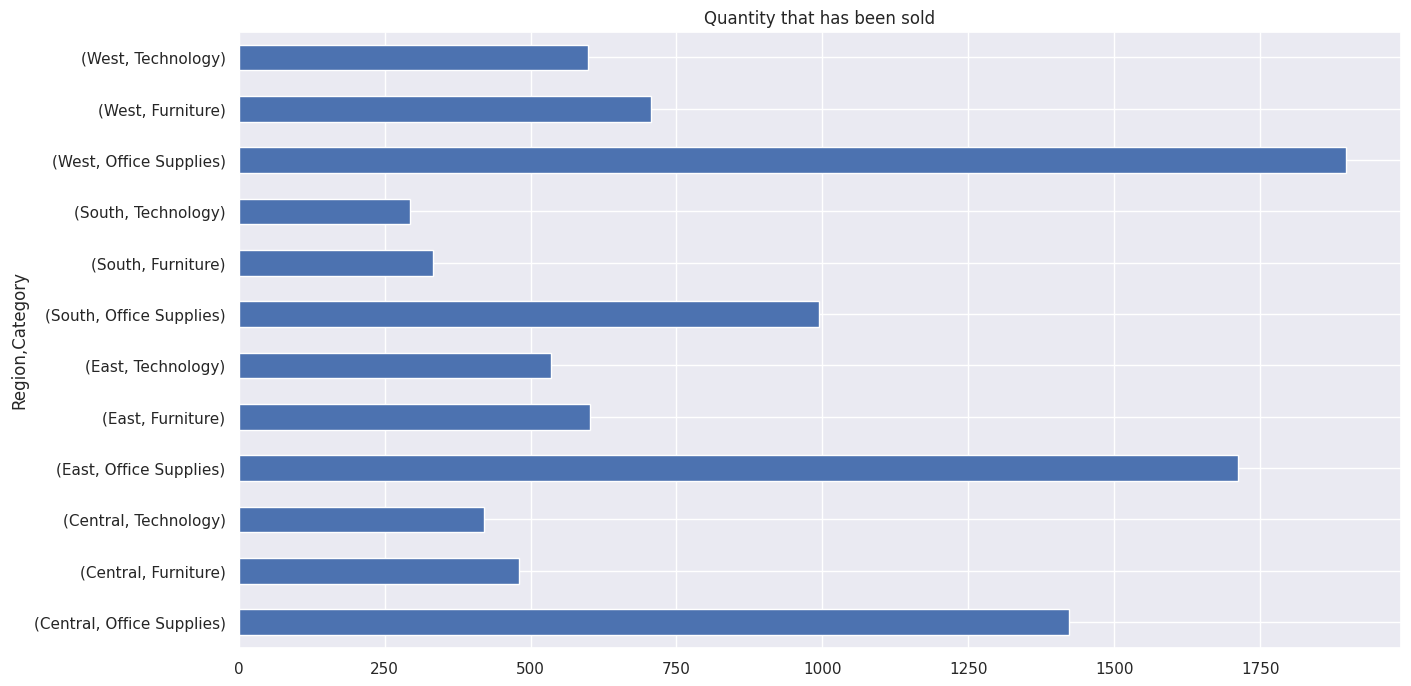

In [64]:
# 使用groupby和value_counts()來統計每個地區（Region）中各個產品類別（Category）的銷售量（即每個類別的訂單數量），並以水平長條圖顯示出來。
data.groupby('Region')['Category'].value_counts().plot(kind='barh',title='Quantity that has been sold')

📊 **圖表說明**

這個圖表將顯示**不同地區中，每個產品類別的銷售量**，

即每個類別在各地區的訂單數量。這有助於了解哪些類別在不同地區的需求情況。

### Repartition of the Profit per Region 💶

分析每個地區（Region）的利潤分佈，可以使用groupby方法，根據每個地區的利潤（Profit）進行總結，並使用圓餅圖顯示每個地區的利潤。

In [67]:
# 計算每個地區（Region）的總利潤（Profit），並將地區名稱和利潤值分別存入變數labels和values
labels = data.groupby('Region')['Profit'].sum().index # 將數據根據地區（Region）進行分組，並計算每個地區的總利潤, 提取分組後的地區名稱。
values = data.groupby('Region')['Profit'].sum().values # 將數據根據地區（Region）進行分組，並計算每個地區的總利潤, 提取每個地區的總利潤數值。

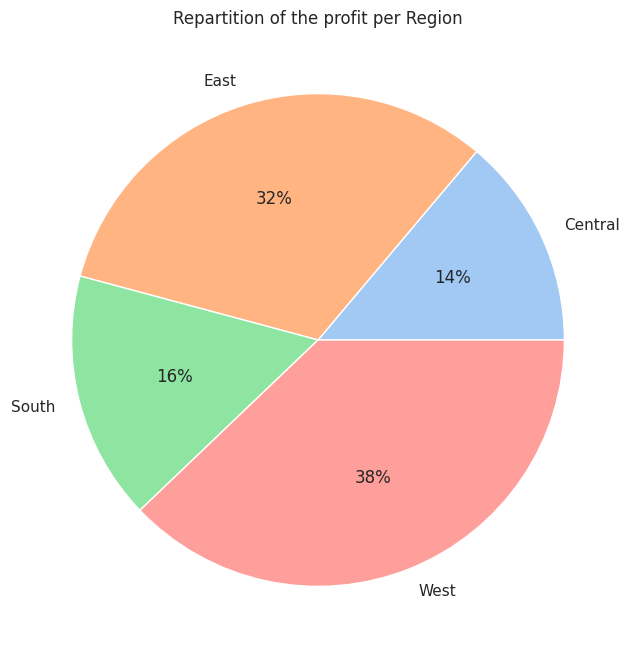

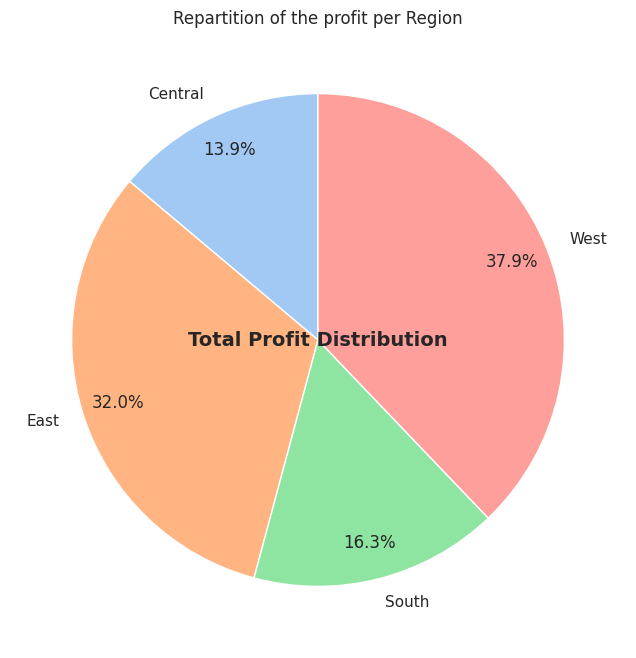

In [70]:
# 請生成一個圓餅圖，顯示每個地區（Region）的利潤（Profit）分佈情況，並使用seaborn的pastel顏色調色板來區分不同地區。
colors = sns.color_palette('pastel')[0:4]  # 選擇pastel調色板中的前4個顏色
plt.pie(values, labels=labels, colors=colors, autopct='%.0f%%')  # 繪製圓餅圖
plt.title("Repartition of the profit per Region")  # 設定圖表標題
plt.show()  # 顯示圖表

# 優化
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# 顯示數字標籤
plt.text(0, 0, 'Total Profit Distribution', ha='center', va='center', fontsize=14, fontweight='bold')

plt.title("Repartition of the profit per Region")
plt.show()

📊 **圖表效果**

該圓餅圖將顯示**每個地區的利潤所佔比例**，

並以直觀的方式呈現各地區的利潤分佈。

每個區域的百分比會顯示在對應的扇區上。

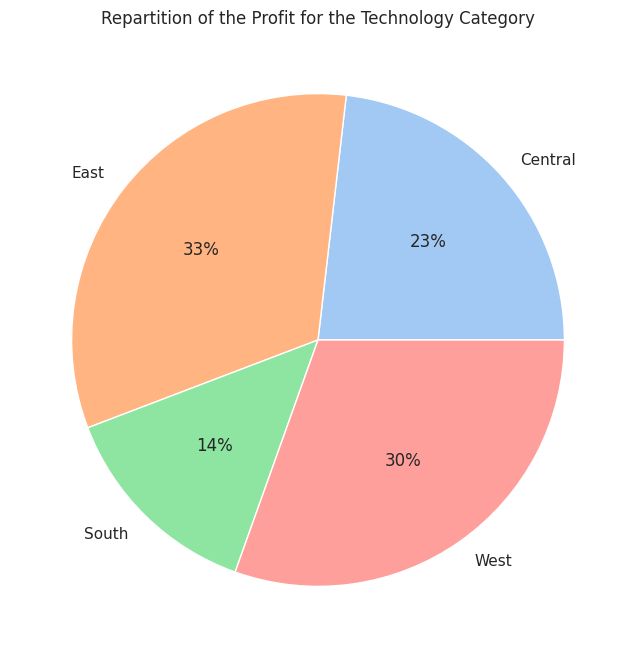

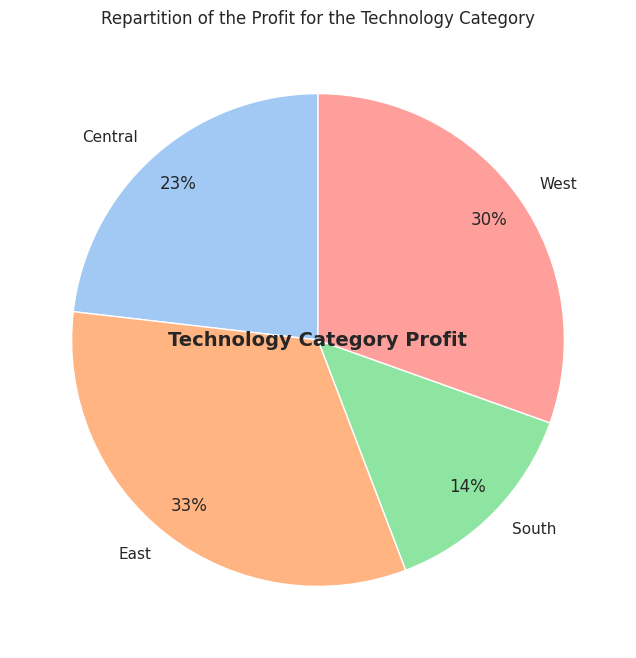

In [73]:
# 使用groupby和sum來計算每個地區在Technology類別下的總利潤，並且用圓餅圖顯示這些分佈。
A = data[data['Category'] == 'Technology']  # 篩選出Technology類別的數據

# 根據Region對Technology類別的Profit進行分組，計算每個地區的總利潤
labels = A.groupby('Region')['Profit'].sum().index
values = A.groupby('Region')['Profit'].sum().values

# 繪製圓餅圖
plt.pie(values, labels=labels, colors=colors, autopct='%.0f%%')

# 設定圖表標題
plt.title("Repartition of the Profit for the Technology Category")

# 顯示圖表
plt.show()

# 優化
plt.pie(values, labels=labels, colors=colors, autopct='%.0f%%', startangle=90, pctdistance=0.85)

# 顯示數字標籤
plt.text(0, 0, 'Technology Category Profit', ha='center', va='center', fontsize=14, fontweight='bold')

plt.title("Repartition of the Profit for the Technology Category")
plt.show()

📊 **圖表效果**

這張圓餅圖將顯示**Technology類別在不同地區的利潤分佈**，

並通過顏色區分不同的地區。每個區域的百分比也會顯示出來，

讓你了解每個地區對Technology類別利潤的貢獻。

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 Even if the West order more technology product than the East, the East make more profit
</div>

# Version  ❶
<hr>

# Look into the Date ⏳

**分析資料中日期的步驟**

當**「查看日期」**時，請分析訂單日期和發貨日期與資料的各個方面

（例如一段時間內的銷售額、利潤或數量）之間的關係。

以下是您**如何繼續探索資料集中與日期相關的見解**。

In [75]:
# 將Order Date和轉換Ship Date為 DateTime
# 確保Order Date和Ship Date都採用正確的格式以執行基於時間的分析。

data['Order Date'] = pd.to_datetime(df['Order Date'])
data['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [76]:
# 提取日期組件：從中提取有用的組件Order Date，例如年、月、日和工作日，以執行更精細的分析。

data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day
data['Order Weekday'] = data['Order Date'].dt.weekday  # Monday=0, Sunday=6

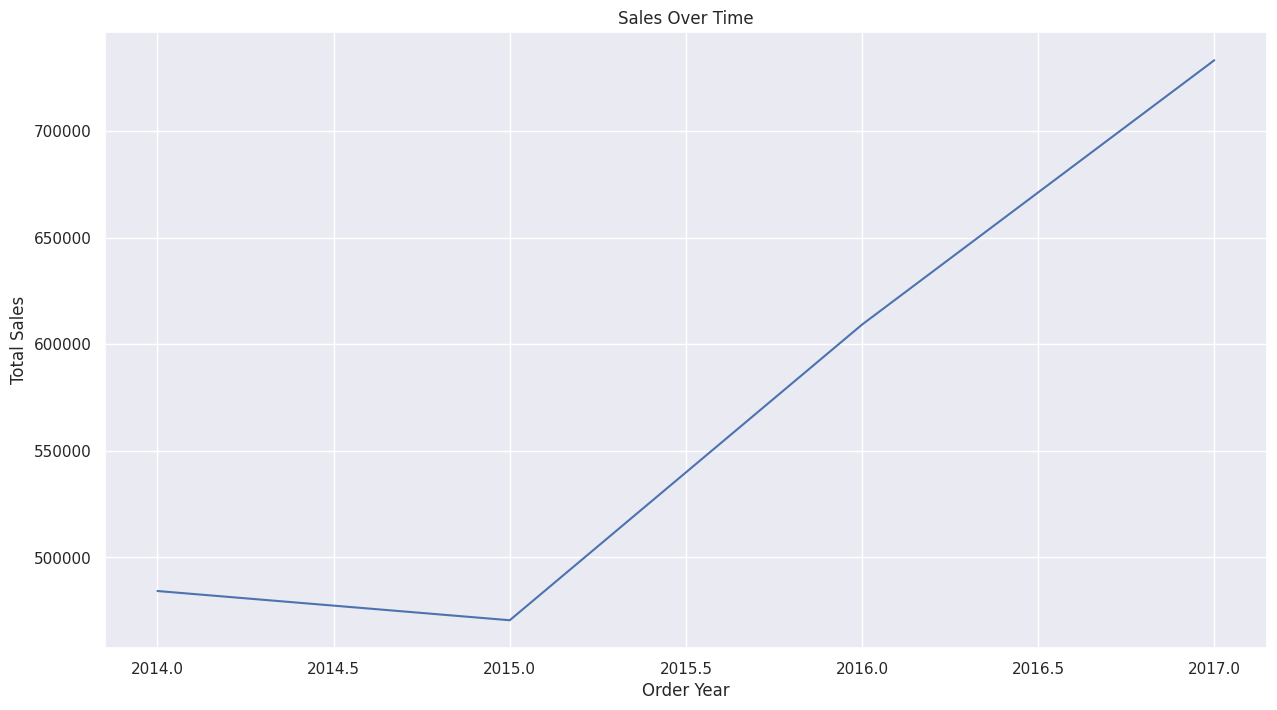

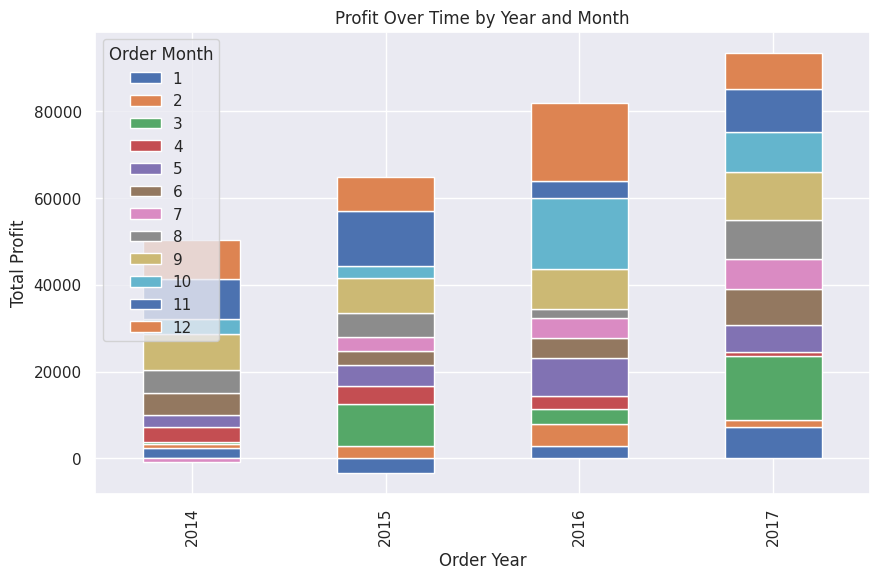

In [77]:
# 分析一段時間內的銷售額和利潤：您現在可以繪製銷售額、利潤或數量在幾個月、幾年或工作日內的變化。
# 一段時間內的銷售額（每年、每月或每天）：

data.groupby('Order Year')['Sales'].sum().plot(kind='line', title='Sales Over Time')
plt.ylabel('Total Sales')
plt.show()

# 隨著時間的推移利潤（每月或每年）：
data.groupby(['Order Year', 'Order Month'])['Profit'].sum().unstack().plot(kind='bar', stacked=True, figsize=(10, 6), title='Profit Over Time by Year and Month')
plt.ylabel('Total Profit')
plt.show()

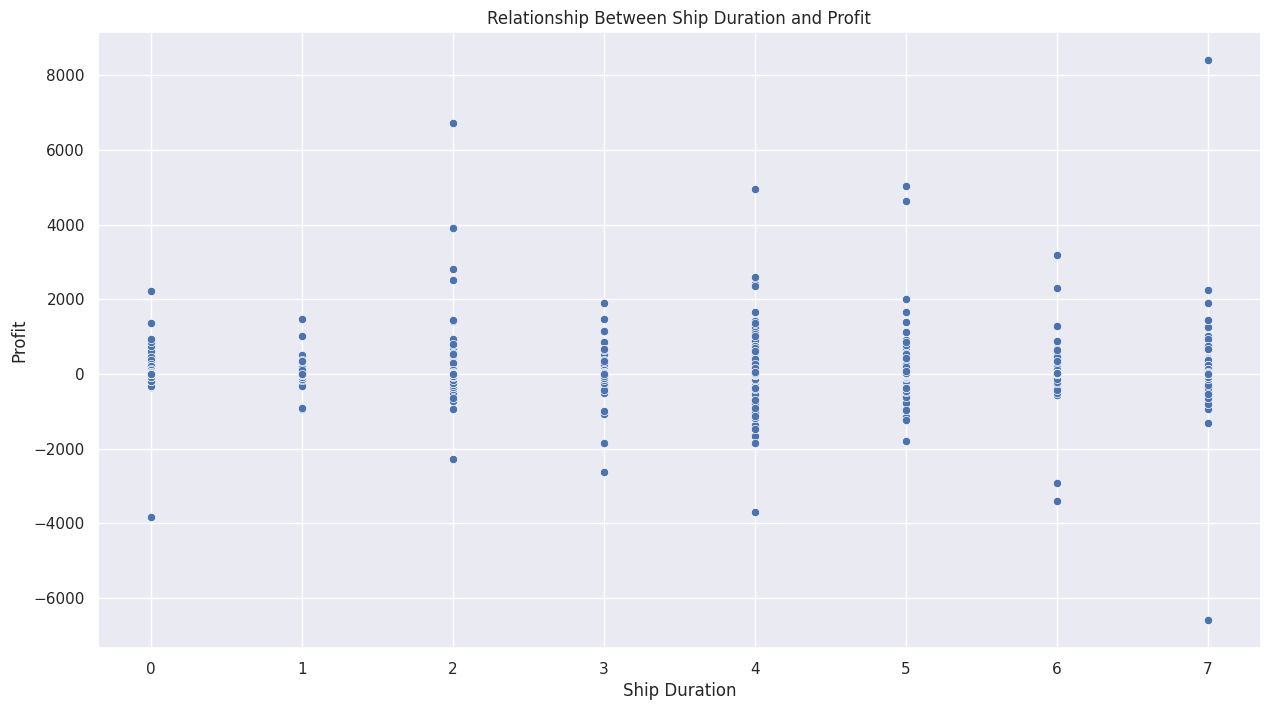

In [80]:
# 查看出貨日期與利潤之間的關係：可以分析訂單出貨所需的時間與利潤或銷售額是否有任何關係。
# 可以計算Ship Date和之間的差異Order Date：
data['Ship Duration'] = (data['Ship Date'] - data['Order Date']).dt.days

# 可以繪製船舶持續時間和利潤之間的關係：
sns.scatterplot(x='Ship Duration', y='Profit', data=data)
plt.title('Relationship Between Ship Duration and Profit')
plt.show()

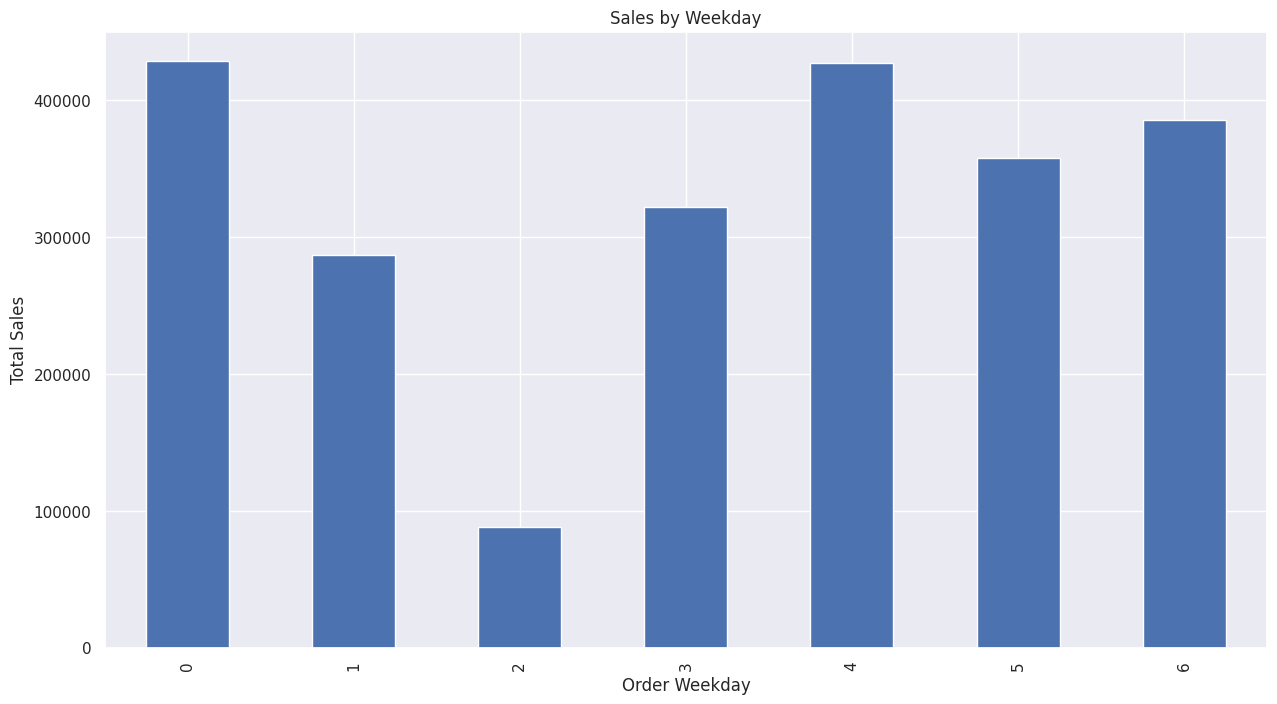

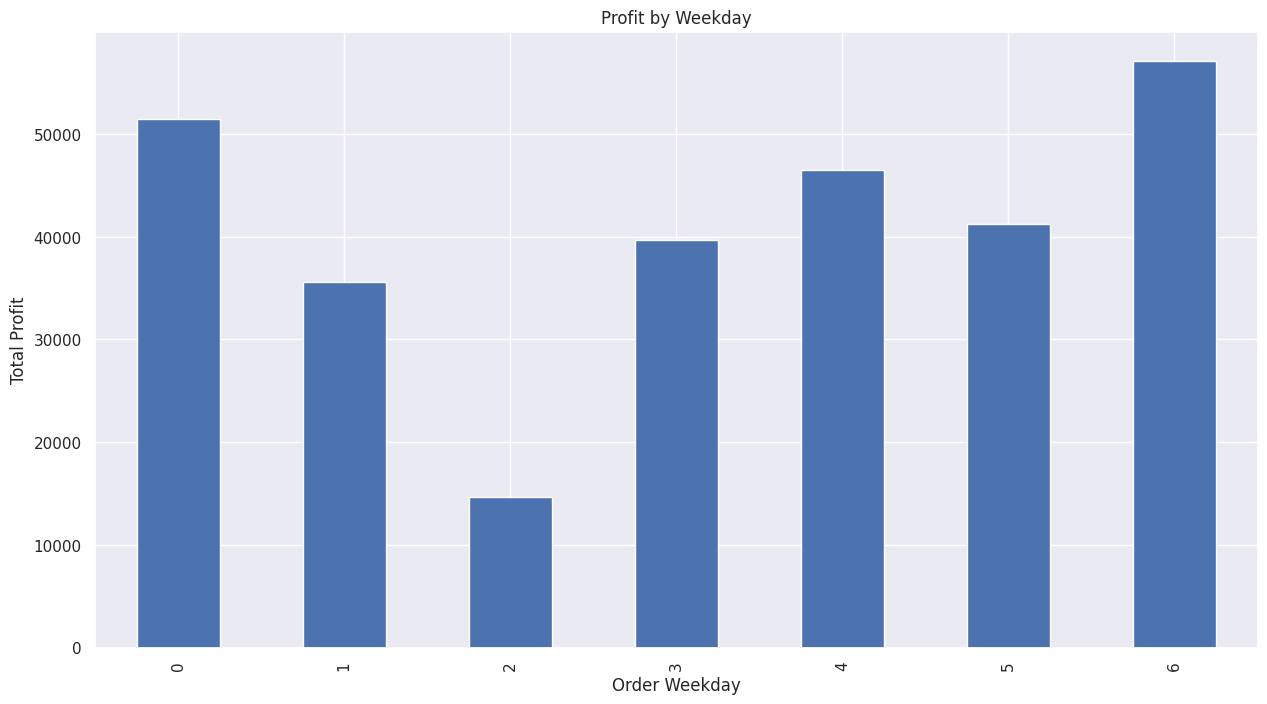

In [81]:
# 按星期幾進行分析：探索訂單和利潤如何根據星期幾而變化。

data.groupby('Order Weekday')['Sales'].sum().plot(kind='bar', title='Sales by Weekday')
plt.ylabel('Total Sales')
plt.show()

data.groupby('Order Weekday')['Profit'].sum().plot(kind='bar', title='Profit by Weekday')
plt.ylabel('Total Profit')
plt.show()

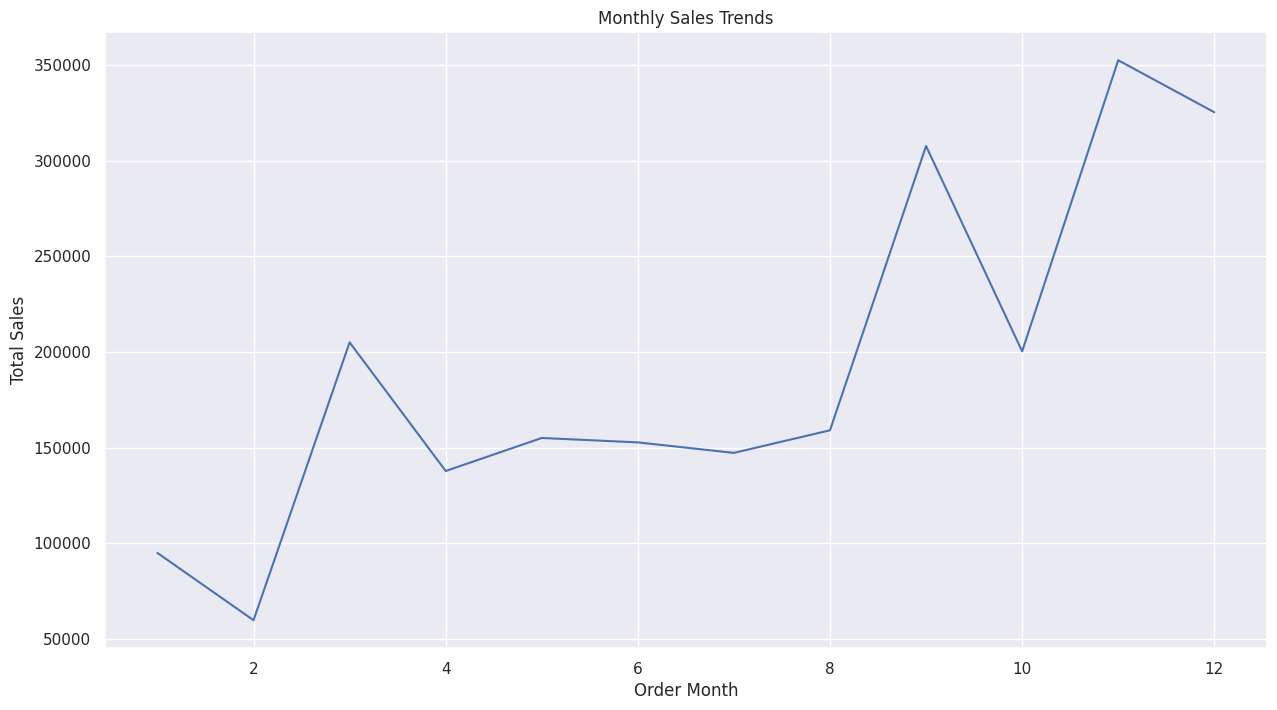

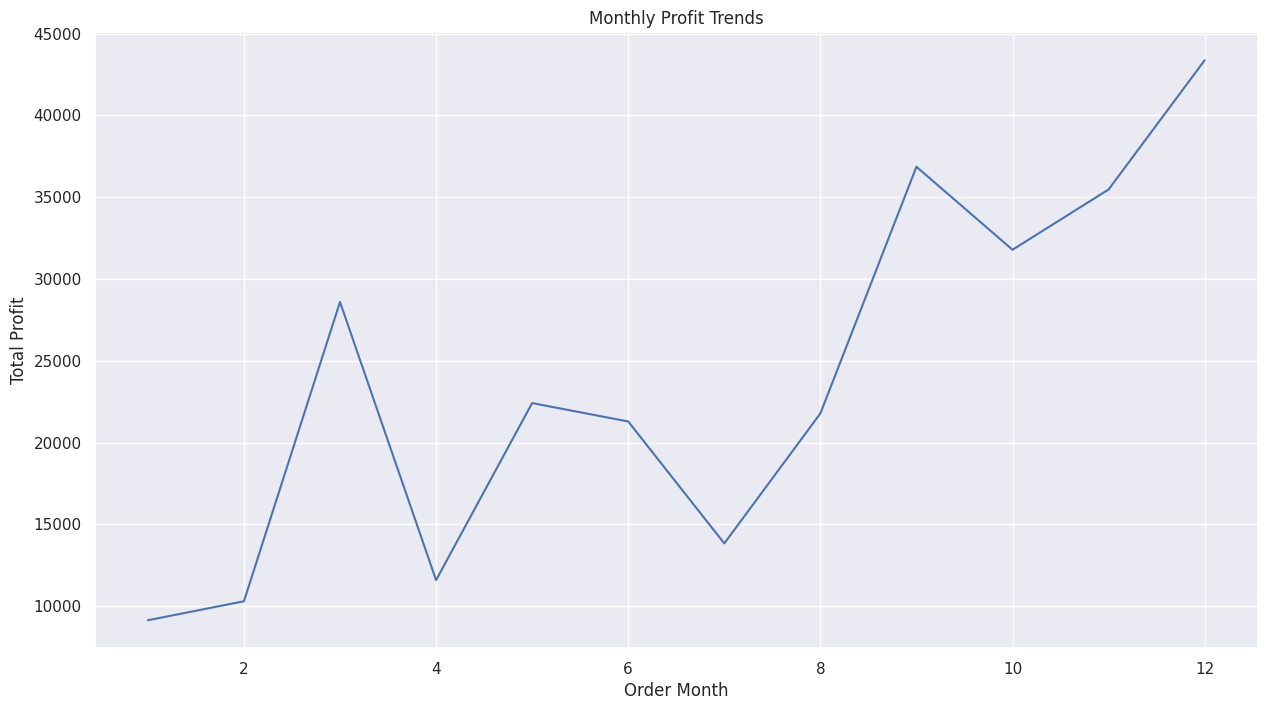

In [82]:
# 季節性或趨勢分析：可以透過繪製每月銷售額或利潤來檢查季節性。
data.groupby('Order Month')['Sales'].sum().plot(kind='line', title='Monthly Sales Trends')
plt.ylabel('Total Sales')
plt.show()

data.groupby('Order Month')['Profit'].sum().plot(kind='line', title='Monthly Profit Trends')
plt.ylabel('Total Profit')
plt.show()

📌 **您可能獲得的見解**

**年度/每月趨勢**：
您可以確定銷售或利潤是否在某些月份達到峰值，顯示季節性需求。

**星期幾**：也許某些工作日的銷售或利潤較高，這可能有助於優化人員配置或促銷。

**運輸時間影響**：您可以確定訂單和運輸之間的時間是否影響獲利能力，

並可能確定需要改善營運的領域。

📌**結論**

透過分析訂單日期和出貨日期，您可以深入了解時間如何影響不同的業務方面，

例如銷售、利潤和運輸效率。此類分析對於識別趨勢、季節性

以及可以改善客戶體驗或營運流程的領域至關重要。

In [83]:
# 定義一個函數來計算資料集中每個產品類別的運輸時間，並計算不同類別的平均、最大和最短運輸時間。
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [84]:
import math

In [86]:
def category_date(category):
    category_1 = data[data['Category'] == category]

    order_date =  pd.to_datetime(category_1["Order Date"])
    ship_date =  pd.to_datetime(category_1["Ship Date"])

    order_date = list(map(to_integer, order_date))
    ship_date = list(map(to_integer, ship_date))

    difference = []
    for date1, date2 in zip(order_date, ship_date):
        difference.append(date2- date1)

    mean = sum(difference) // len(difference)
    maxi = max(difference)
    mini = min(difference)

    print("Mean of the Category {} {} ".format(category,mean))
    print("Maximum date of the Category {} {} ".format(category,maxi))
    print("Minimum date of the Category {} {} ".format(category,mini))
    print("\n")
    print("\n")

category_date('Technology')
category_date('Furniture')
category_date('Office Supplies')

Mean of the Category Technology 130 
Maximum date of the Category Technology 8876 
Minimum date of the Category Technology 0 




Mean of the Category Furniture 145 
Maximum date of the Category Furniture 8876 
Minimum date of the Category Furniture 0 




Mean of the Category Office Supplies 150 
Maximum date of the Category Office Supplies 8876 
Minimum date of the Category Office Supplies 0 






**逐步細分：**

**to_integer函數：**

此函數將DateTime物件轉換為格式為整數YYYYMMDD。例如，2025-01-30會變成20250130

這有助於將兩個日期之間的差異計算為整數（表示天數）。

**category_date功能：**

**此函數適用於特定類別並計算訂單日期和出貨日期之間的差異。**

然後，它計算所選類別的**平均值、最大值和最小差異**。

**依類別分析：**此功能針對**「技術」**、**「家具**」和**「辦公用品」**類別呼叫。

它計算並列印每個類別的平均運輸時間（以天為單位）、最長運輸時間和最短運輸時間。

📌 **預期輸出**
此功能將顯示每個選定類別的平均、最大和最短運輸持續時間，

讓您了解運送不同類別的產品平均需要多長時間。

📌 **見解**

**平均運輸時間**：有助於了解運送該類別中的商品所需的典型時間。

**最大/最短運輸時間：**提供對異常值的洞察 - 非常長或非常短的運輸時間。

**這些資訊可用於改善物流、預測客戶交貨時間或識別需要更好供應鏈管理的類別。**

# City 🌆 & Profit  💵

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 531 City there are too many city so the information may not be too interesting to deal with we can see which city order the most technology product or others categories
</div>

我們可以看看哪個城市訂購最多的科技產品或其他類別

In [91]:
def city_profit(category):
    category_1 = data[data['Category'] == category]
    category_1.groupby('City')['Profit'].sum().sort_values(ascending=False)[:5].plot(kind='bar',title="Top 5 Cities that made the most profit in {}".format(category))


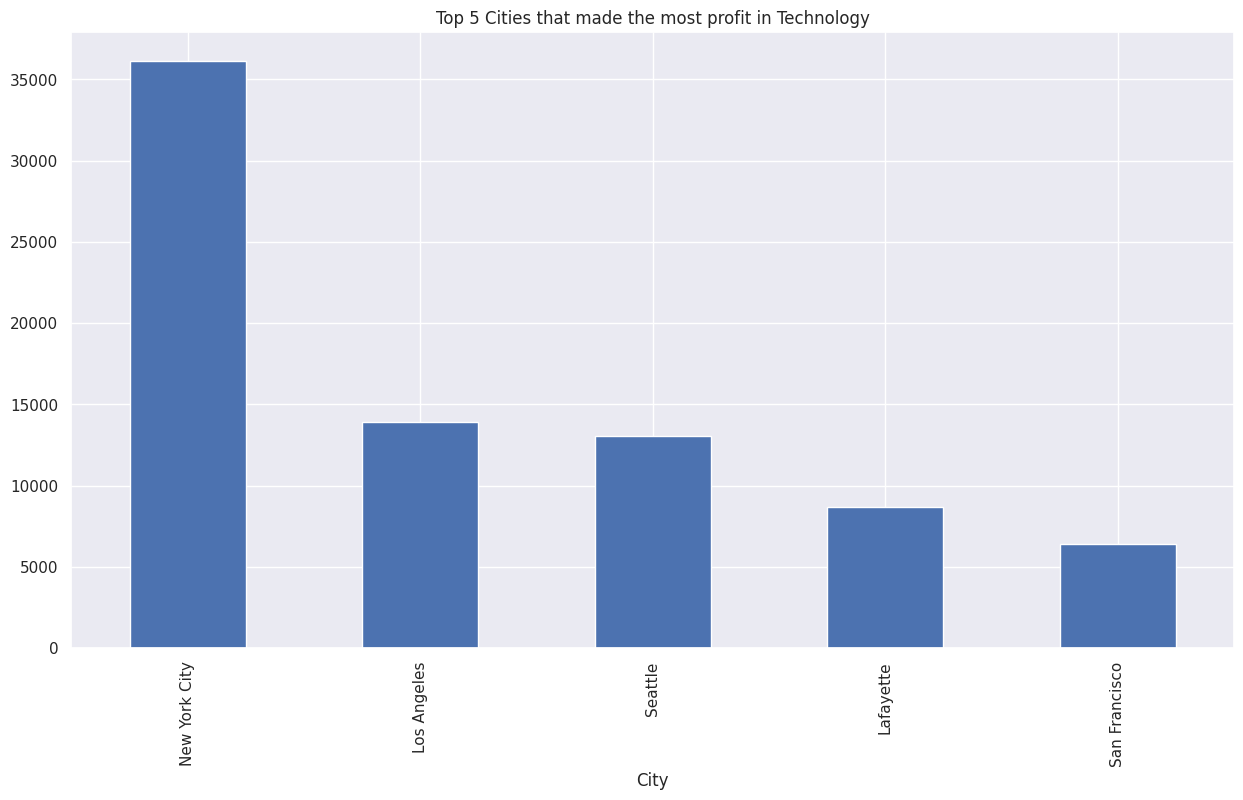

In [92]:
city_profit('Technology')

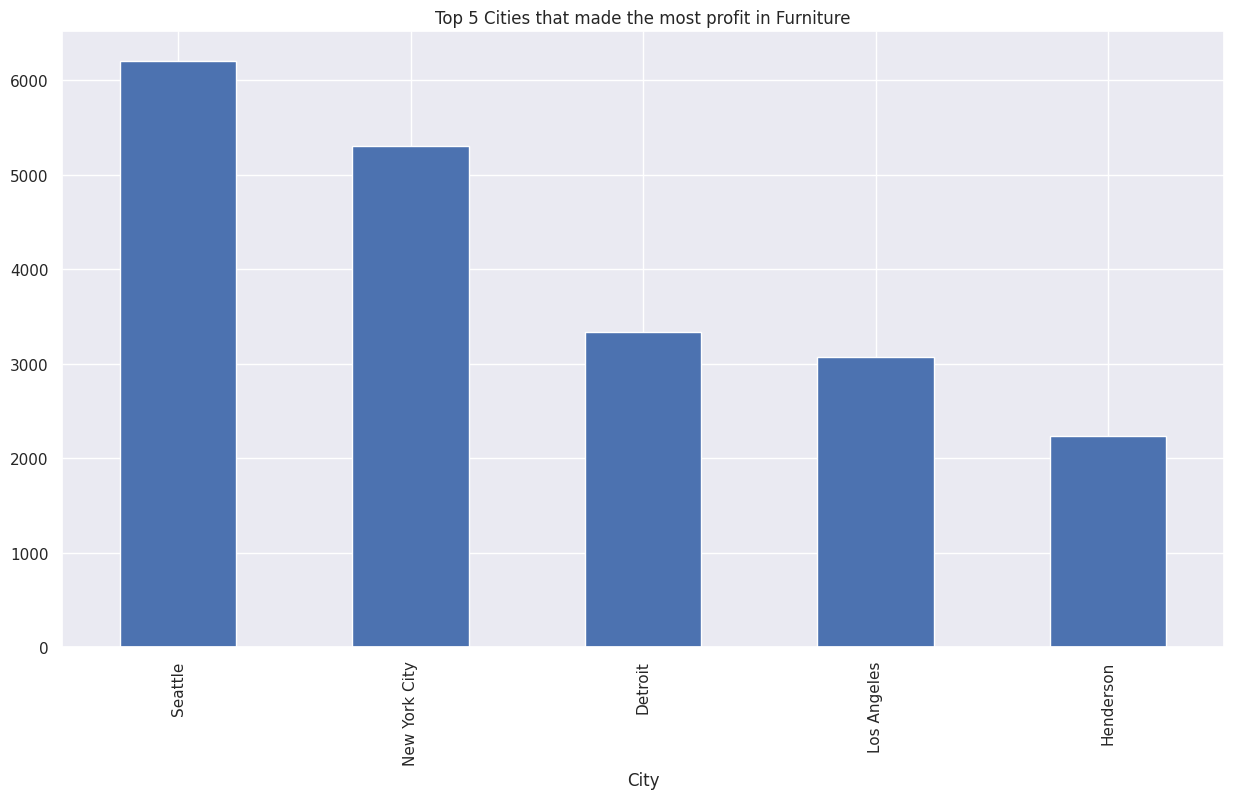

In [93]:
city_profit('Furniture')

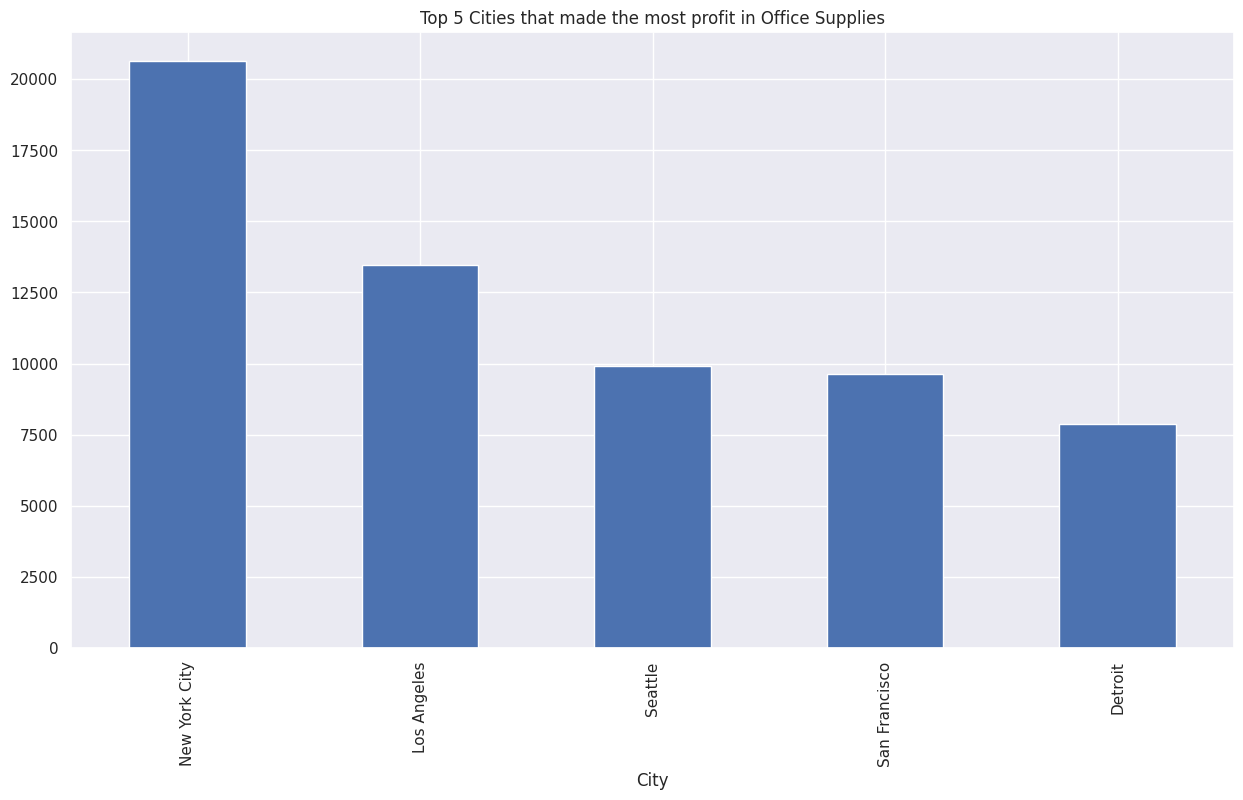

In [94]:
city_profit('Office Supplies')

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 New York City is the heart of united states when we see those values however we cannot see the partitions, the populations of each city can be a useful informations.
</div>

<ipython-input-95-0ed6263be271>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Sub-Category Count')

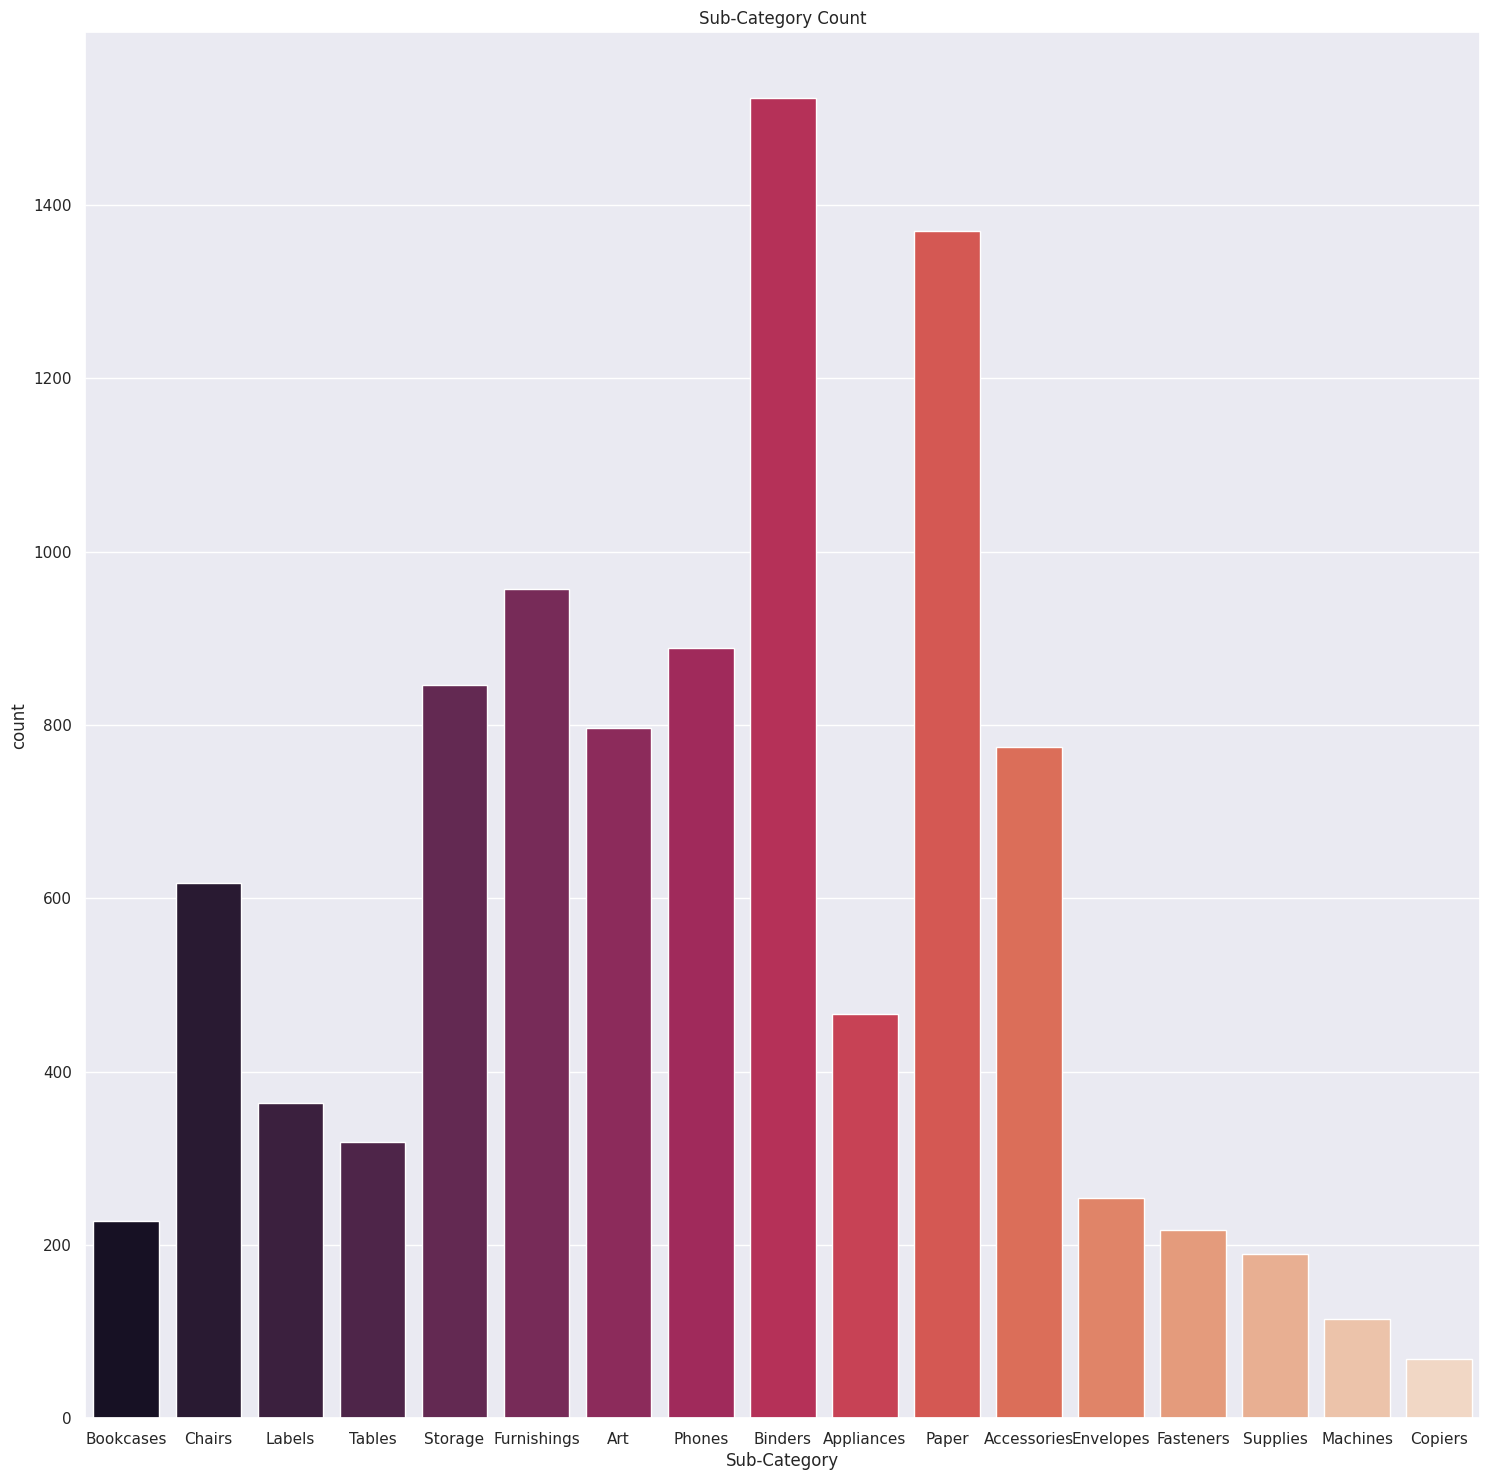

In [95]:
plt.figure(figsize=(18,18))
sns.countplot(x=data['Sub-Category'],palette='rocket')
plt.title("Sub-Category Count")

# Customers 🧓🏻 👩🏽 👨🏻 🧑

In [ ]:
df['Customer Name'].value_counts()[:10].plot(kind='barh',title='Customer Name & Product Ordered')

In [ ]:
customers = list(df['Customer Name'].value_counts()[:10].index)
filters = df['Customer Name'].isin(customers)
A = df[filters]

In [ ]:
colors = sns.color_palette('pastel')[0:]


values = A.groupby('Customer Name')['Profit'].sum()
values

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 Zuschuss Carroll is in the top 10 but her/his profit is negative
</div>

In [ ]:
A = A[A['Customer Name'] != 'Zuschuss Carroll']

In [ ]:
del customers[-2]

In [ ]:
plt.figure(figsize=(15,15))
values = A.groupby('Customer Name')['Profit'].sum()

plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the top 9 Customer")
plt.show()

In [ ]:
plt.pie(A['Region'].value_counts().values, labels = A['Region'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("Order come from")
plt.show()

# Version ❷
<hr>

# Machine Learning 🧙
<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 Now let's try to build a machine learning model to predict profit,Instead of predicting the exact Sales we can make this a classification problem and classify the Sales between n number of categories
</div>

In [ ]:
df.head()

# Define Columns 🪦

In [ ]:
X = df[['Segment','Ship Mode','Category','Profit','Region','Quantity','Sales']]
X.head()

### Add Categories of Sales ➕

In [ ]:
values = X['Sales'].values
mini = min(values)
maxi = max(values)
mean = sum(values) / len(values)
mean,mini,maxi,len(values),mean / 3

In [ ]:
array = []
value = mini
for i in range(4):
    value += mean // 6
    array.append(value)

array

In [ ]:
def affectColumn(sale):
    index = 1
    i = 0
    while i < len(array) and sale > array[i]:
        index += 1
        i += 1
    return index

saleCategory = list(map(affectColumn,X['Sales'].values ))
max(saleCategory),len(saleCategory),min(saleCategory)

In [ ]:
X['SaleCategory'] = saleCategory

In [ ]:
X.head()

In [ ]:
sns.countplot(x=X['SaleCategory'],palette='rocket')